In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-housing-market-analysis-2015-2024")
path_1 = kagglehub.dataset_download("gpandi007/usa-housing-dataset")
print("Path to dataset files:", path)

import pandas as pd
# Load the dataset
global_data = pd.read_csv(path + "/global_housing_market_extended.csv")
us_data = pd.read_csv(path_1 + "/housing_train.csv")

/Users/dolphins/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/dolphins/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/dolphins/.cache/kagglehub/datasets/atharvasoundankar/global-housing-market-analysis-2015-2024/versions/1


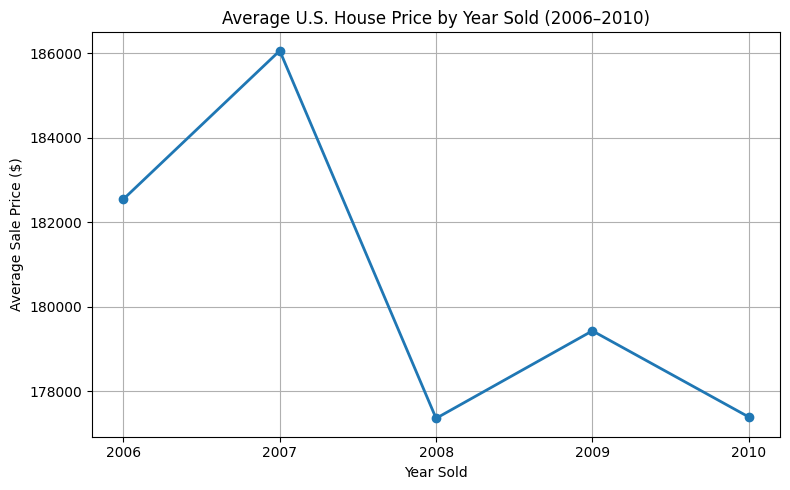

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by year sold and calculate the average sale price for each year
avg_price_by_year = us_data.groupby('YrSold')['SalePrice'].mean().reset_index()

# Set up the figure size for the plot
plt.figure(figsize=(8, 5))

# Plot the average sale price by year with line and markers
plt.plot(avg_price_by_year['YrSold'], avg_price_by_year['SalePrice'], 
         marker='o', linewidth=2)

# Set x-axis ticks to match each year in the dataset
plt.xticks(ticks=avg_price_by_year['YrSold'])

# Add title and axis labels
plt.title("Average U.S. House Price by Year Sold (2006–2010)")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price ($)")

# Add gridlines for better readability
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


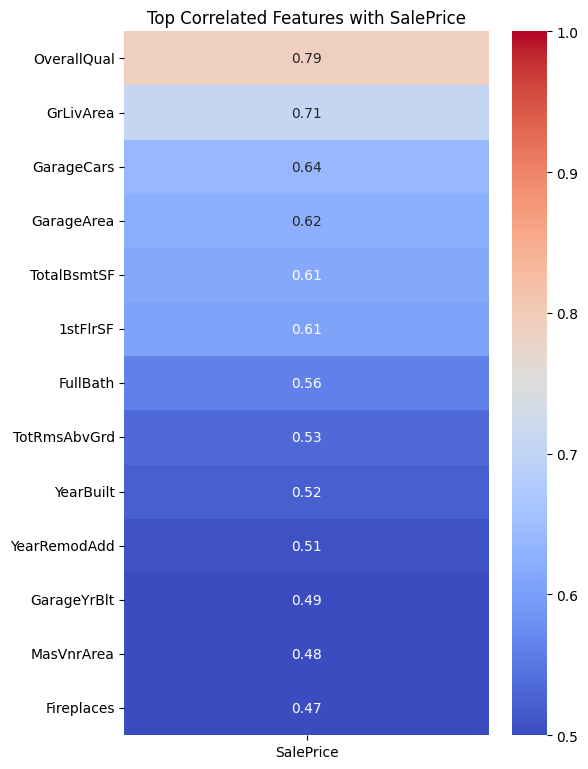

In [18]:
# See how numerical variables correlate with salesprice
import seaborn as sns
numeric_data = us_data.select_dtypes(include=['int64', 'float64'])

# Compute correlations with SalePrice
correlation = numeric_data.corr()['SalePrice'].sort_values(ascending=False)

# Filter to show only strong correlations
top_corr = correlation[correlation > 0.4].drop('SalePrice')

# Create heatmap of correlated variables, blue = less correlated red = more correlated
plt.figure(figsize=(6, len(top_corr) * 0.6))
sns.heatmap(top_corr.to_frame(), annot=True, cmap='coolwarm', vmin=0.5, vmax=1, cbar=True)
plt.title("Top Correlated Features with SalePrice")
plt.tight_layout()
plt.show()

In [11]:
!pip install kagglehub
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Somerst'),
  Text(5, 0, 'NridgHt'),
  Text(6, 0, 'Timber'),
  Text(7, 0, 'StoneBr'),
  Text(8, 0, 'ClearCr'),
  Text(9, 0, 'Blmngtn')])

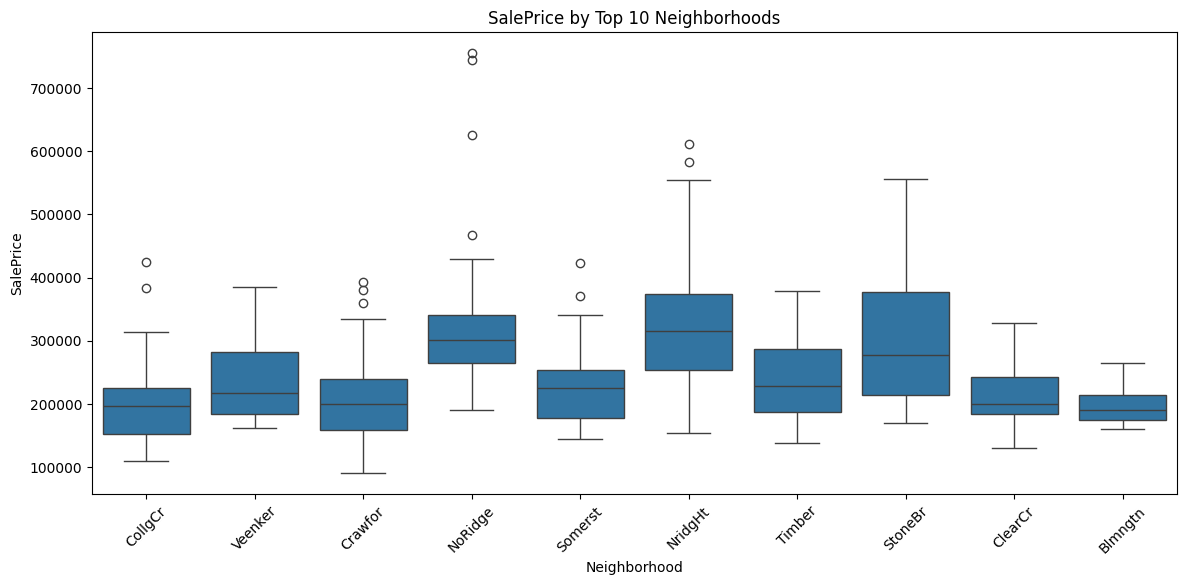

In [19]:
# Set the figure size for the plot
plt.figure(figsize=(14, 6))

# Identify the top 10 neighborhoods by average SalePrice
top_neigh = us_data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).head(10).index

# Create a boxplot showing the distribution of SalePrice for the top 10 neighborhoods
sns.boxplot(x='Neighborhood', y='SalePrice', 
            data=us_data[us_data['Neighborhood'].isin(top_neigh)])

# Set the title of the plot
plt.title("SalePrice by Top 10 Neighborhoods")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
